<img src="https://github.com/Fortuz/edu_Adaptive/blob/main/practices/assets/logo.png?raw=1" width="800">

Made by **Balázs Nagy** and **Márk Domokos**

[<img src="https://github.com/Fortuz/edu_Adaptive/blob/main/practices/assets/open_button.png?raw=1">](https://colab.research.google.com/github/Fortuz/edu_Adaptive/blob/main/practices/L02%20-%20Multivariate%20Linear%20Regression_solved.ipynb)

# Labor 02: Multivariate linear regression

### Property prices:

In this exercise, we will extend our univariate linear regression model introduced in lab L01 to the multivariate linear regression case to estimate house prices.

Suppose we want to sell a house, but we want to know the real value of the house so that we do not lose money on the sale. One possible way to do this is to collect data and then estimate the real estate market price of the house by building a model based on the data. Our data will be the area of the property ($m^2$) and the number of rooms (units), and the price ($) determined at the time of sale.

### 1: Import the packages
We will need:
- NumPy for array management
- MatPlotLib pyplot package for visualization
- Pandas for data reading

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 2: Load data

The data will be loaded from a publicly available file. An alternative solution would be to upload the data file directly to the google colab file system.

In [2]:
!wget https://github.com/Fortuz/edu_Adaptive/raw/main/practices/assets/Lab02/Lab2data.txt

--2024-12-10 21:05:05--  https://github.com/Fortuz/edu_Adaptive/raw/main/practices/assets/Lab02/Lab2data.txt
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Fortuz/edu_Adaptive/main/practices/assets/Lab02/Lab2data.txt [following]
--2024-12-10 21:05:06--  https://raw.githubusercontent.com/Fortuz/edu_Adaptive/main/practices/assets/Lab02/Lab2data.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 657 [text/plain]
Saving to: ‘Lab2data.txt’

Lab2data.txt        100%[===================>]     657  --.-KB/s    in 0s      

2024-12-10 21:05:06 (27.2 MB/s) - ‘Lab2data.txt’ saved [657/657]



Load in the data! Use the Pandas package to do this and then convert it into a numpy array. Visualize the data.

In [3]:
data = pd.read_csv('Lab2data.txt',header = None).to_numpy()
X = data[:,0:2]                                                # sort X
m = X.shape[0]                                                 # number of samples
Y = data[:,2].reshape(m,1)                                     # sort Y

print('X:',X.shape)                                            # check the shapes
print('Y:',Y.shape)
print('Number of samples: ',m)
print(X)

X: (47, 2)
Y: (47, 1)
Number of samples:  47
[[2104    3]
 [1600    3]
 [2400    3]
 [1416    2]
 [3000    4]
 [1985    4]
 [1534    3]
 [1427    3]
 [1380    3]
 [1494    3]
 [1940    4]
 [2000    3]
 [1890    3]
 [4478    5]
 [1268    3]
 [2300    4]
 [1320    2]
 [1236    3]
 [2609    4]
 [3031    4]
 [1767    3]
 [1888    2]
 [1604    3]
 [1962    4]
 [3890    3]
 [1100    3]
 [1458    3]
 [2526    3]
 [2200    3]
 [2637    3]
 [1839    2]
 [1000    1]
 [2040    4]
 [3137    3]
 [1811    4]
 [1437    3]
 [1239    3]
 [2132    4]
 [4215    4]
 [2162    4]
 [1664    2]
 [2238    3]
 [2567    4]
 [1200    3]
 [ 852    2]
 [1852    4]
 [1203    3]]


### 3: Normalising values (Feature scaling & Mean normalization)

The features of the data points may be in different magnitudes. In our case, it is easy to see that there is at least an order of magnitude difference between the area of the property and the number of rooms. In such cases, it is worth normalising our values so that they fall within the same order of magnitude and all input variables fall within the range of [-1..1] or [0..1] interval. This operation will promote convergence, as there will be no dominant variable present to suppress the effect of other variables. <br>
For this we will use the following relationship:

$ x = \frac{x - mean(x)}{std(x)} $

, with other words the mean of the samples is subtracted from a given sample (mean normalization) and divided by the standard deviation of the samples (feature scaling).

Graphical meaning: around the origin makes it easier to find the line that covers our data according to our hypothesis. It is therefore useful to trasform our data into this region.

<img src="https://github.com/Fortuz/edu_Adaptive/blob/main/practices/assets/Lab02/Pics/L02_Scaling.png?raw=1" width="350">

Create the normalizing function!

In [4]:
def featureNormalize(X):
################### CODE HERE ########################
# Calculate the normalized X vector.
# To do so calculate the mean and standard deviation of the input data first.

    avg = np.mean(X, axis=0) # axis=0 calculates the column wise mean giving a (1,2) dimension vector
    sigma = np.std(X, axis=0) # axis=0 calculates the column wise standard deviation giving a (1,2) dimension vector

    X_norm = (X - avg) / sigma # this will give a normalized value of (m,2) dimension array


######################################################
    return X_norm, avg, sigma                            # return the formula based result

print('Normalizing X vector ...')
X_norm,avg,sigma = featureNormalize(X)                   # normalization
X_norm=np.column_stack((np.ones(m),X_norm))              # add bias
print('Normalization done.')

Normalizing X vector ...
Normalization done.


After normalization, the BIAS is added to the input X matrix.

### 4: Gradient based method
Following the example of the previous exercise, we create the gradient method in multivariable form! Our data structure is as follows.

<img src="https://github.com/Fortuz/edu_Adaptive/blob/main/practices/assets/Lab02/Pics/L02_Matrixok.png?raw=1" width="500">

Here we have more features so the input vector is bigger, but everything will work as previously.

The hypothesis function for the multivariate case can be written as follows:

$ h_{w}(x)=w_0x_0+w_1x_1+w_2x_2+ ... +w_nx_n $ <br>

And with matrix operations:

<img src="https://github.com/Fortuz/edu_Adaptive/blob/main/practices/assets/Lab02/Pics/L02_XW.png?raw=1" width="550">

Formula of the cost function: <br>

$ C(W)=C(w_0,w_1,...,w_n)=\frac{1}{2m}\sum_{i=1}^{m}(h_w(x^i)-y^i)^2 $

Tip: When programming, take advantage of vector multiplication.

<img src="https://github.com/Fortuz/edu_Adaptive/blob/main/practices/assets/Lab02/Pics/L02_Sum.png?raw=1" width="550">

General weight update formula of the gradient method:

$ \color{red}{(j=0...n)}\hspace{7mm} w_j:=w_j-\mu\frac{1}{2m}\sum_{i=1}^{m}((h_w(x^i)-y^i)\cdot x_j^i) $

$\color{red}{Pay\ attention\ to\ the\ simultaneous\ update!}$

Current matrix values are used to calculate the new updated matrix values. If a calculated value stored back in the matrix and this already updated value is used to calculate the next updated value in the same matrix it will result in a faulty calculation.

In [5]:
# Cost function
def computeCostMulti(X,Y,W):
    C=0   # To make sure there is nothing in this variable

    ################### CODE HERE ########################
    # Implement the cost function
    m = Y.shape[0] # number of training examples

    # Hypothesis function: h(x) = X * W
    h = np.dot(X, W) # Matrix multiplication of X and W (X: (m,3), W: (3,1), h: (m,1))

    # Cost function: C(W) = (1 / (2 * m)) * sum((h(x) - y)^2)
    C = (1 / (2 * m)) * np.sum(np.square(h - Y))

    #####################################################

    return C

In [8]:
# Gradient descent Method
def gradientDescentMulti(X,Y,W,lr,epochs):

    ################### CODE HERE ########################
    # Implement the Gradient Descent algorithm for multiple variables

    C_history = np.zeros(epochs) # Initialize C_history as a numpy array with size epochs

    for i in range(epochs):
        # Hypothesis function: h(x) = X * W
        h = np.dot(X, W) # (m,3) * (3,1) = (m,1)

        # Gradient calculation: (1/m) * X' * (h(x) - y)
        gradient = (1/m) * np.dot(X.T, (h - Y)) # (3,m) * (m,1) = (3,1)

        # Weight update: W = W - lr * gradient
        W = W - lr * gradient # (3,1) - scalar * (3,1) = (3,1)

        # Cost calculation for current iteration
        C_history[i] = computeCostMulti(X, Y, W)


    #####################################################

    return W, C_history

Let's try out the Gradient Descent algorithm with multiple variables.

In [9]:
print('Running gradient descent ...')
lr = 0.015                                                  # learning rate
epochs = 1200                                               # number of epochs
W=np.zeros((3,1))                                           # initial weights (0;0;0)
W,C_history= gradientDescentMulti(X_norm,Y,W,lr,epochs)     # Use the Gradient Descent Method
print('''Weights expected from gradient descent (approx.):
 [[340372.05039403]
 [109434.51046856]
 [ -5454.97874429 ]]
''')
print('Weights computed from gradient descent:\n', W)

if int(W[0,0]) == 340372 and int(W[1,0]) == 109434 and int(W[2,0]) == -5454:
    print("\n The gradientDescentMulti() function is good. You can proceed.")
else:
    print("\n Something not right. Please modify the function!")

Running gradient descent ...
Weights expected from gradient descent (approx.):
 [[340372.05039403]
 [109434.51046856]
 [ -5454.97874429 ]]

Weights computed from gradient descent:
 [[340412.65505089]
 [109427.27281937]
 [ -6557.83120394]]

 Something not right. Please modify the function!


Check the convergence with the help of a graph.

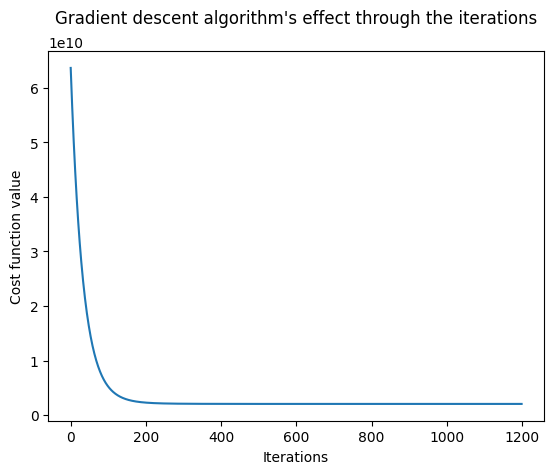

In [10]:
plt.plot(C_history)                                                                 # C_history plot
plt.title("Gradient descent algorithm's effect through the iterations",pad= 20)
plt.xlabel("Iterations")
plt.ylabel("Cost function value")
plt.show()

### 5: Prediction
Let's estimate the price of a 1650 $m^2$, 3 bedroom property! Watch for the normalization of the data, which is also neccessary here. Use the previously calculated mean and sigma for the normalization.

In [12]:
def predict(FEET, BED):

    ################### CODE HERE ########################
    # Predict the prize of a house given by the size (FEET) and number of bedrooms (BED)
    x = np.array([[FEET, BED]]) # Create a feature vector
    x_norm = (x - avg) / sigma # Normalize the feature vector
    x_norm = np.column_stack((np.ones(x_norm.shape[0]), x_norm)) # Add bias term

    price = np.dot(x_norm, W) # Predict the price


    #####################################################

    return price

In [13]:
FEET = 1650
BED = 3
price = predict(FEET, BED)
print('''Prediction for a 1650 sq-ft / 3 bedroom house:
(predicted price should be approx. $293000) %.2f''' % price[0])

Prediction for a 1650 sq-ft / 3 bedroom house:
(predicted price should be approx. $293000) 293085.97


<ipython-input-13-f3340e104c64>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('''Prediction for a 1650 sq-ft / 3 bedroom house:


## In a slightly different way: with high level packages

In [14]:
import pandas as pd
from sklearn.linear_model import LinearRegression

data = pd.read_csv('Lab2data.txt',header = None)

X = data.iloc[:, 0:2].values.reshape(-1,2)                              # arrange X
Y = data.iloc[:, 2].values.reshape(-1,1)                                # arrange Y

lin_reg = LinearRegression()                                            # creation of a linear regression model class
lin_reg.fit(X,Y)                                                        # fit based on X,Y

pred = lin_reg.predict([[1650,3]])                                      # prediction for a house with 1650 m^2 and 3 bedrooms
print('Prediction for a 1650 sq-ft / 3 bedroom house:\n %.2f' % pred[0,0])

Prediction for a 1650 sq-ft / 3 bedroom house:
 293081.46


<div style="text-align: right">This lab exercise uses elements from Andrew Ng's Machine Learning course.</div>